In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
import os

In [28]:
def read_training_data(traingpath):
    data_path1 =  traingpath + 'EXIST2021_test.tsv'
    data_path2 =  traingpath + 'EXIST2021_training.tsv'
    df1 = pd.read_csv(data_path1, sep='\t')
    df2 = pd.read_csv(data_path2, sep='\t')
    trainingData = df2.append(df1)
    trainingData = trainingData.reindex()
    return trainingData

In [29]:
traingpath = os.curdir + '/data/training/'

In [30]:
trainingData = read_training_data(traingpath)

In [31]:
trainingData.head(10)

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist
5,EXIST2021,6,twitter,en,@Smithcouple971 Hello....m raj....m with good ...,sexist,sexual-violence
6,EXIST2021,7,twitter,en,@Texas17761 @MomsDemand True story: Me to 18 y...,non-sexist,non-sexist
7,EXIST2021,8,twitter,en,Head coach Caroline Ouellette is excited to sh...,non-sexist,non-sexist
8,EXIST2021,9,twitter,en,"@BankofIndia_IN Devli Branch , New Delhi shoul...",non-sexist,non-sexist
9,EXIST2021,10,twitter,en,Bravo to this woman. No matter what you believ...,non-sexist,non-sexist


In [32]:
en_content = trainingData[trainingData['language']=='en']['text'].tolist()

In [33]:
es_content = trainingData[trainingData['language']=='es']['text'].tolist()

In [34]:
en_count = TfidfVectorizer()
en_count = en_count.fit(en_content)

In [35]:
en_count_vec = en_count.transform(en_content)

In [36]:
en_count.get_feature_names_out()

array(['00', '000', '000size', ..., 'セクハラ大臣', 'ㅤㅤㅤ', '光to'], dtype=object)

In [37]:
len(en_content)

5644

In [38]:
en_count_vec.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
import nltk
import string
from nltk.corpus import stopwords

In [40]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [41]:
enstop = stopwords.words('english')

In [42]:
enstop +=  ['!',',','.','?','-s','-ly','</s>','\'s', '@','#','’', ':','i', 'https']

In [43]:
freq = FreqDist()
for sent in en_content:
    words = [word for word in word_tokenize(sent) if word not in enstop]
    for word in words:
        freq[word.lower()] += 1

In [44]:
freq

FreqDist({'i': 3004, 'women': 1918, 'https': 1454, 'like': 1227, "n't": 1070, 'men': 811, 'woman': 720, 'you': 530, '``': 522, ';': 510, ...})

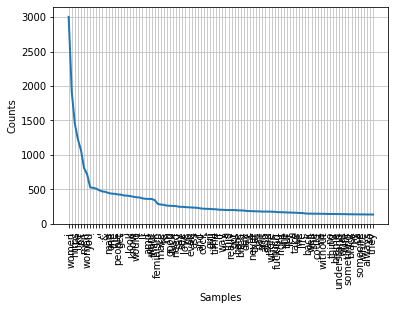

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
freq.plot(100)